In [0]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules

In [0]:
data = pd.read_csv("/content/filtered_data.csv") ;
data

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
400911,525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400912,525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400913,525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400914,525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [0]:
print(data['Country'].unique())
# Stripping extra spaces in the descriptioni 
data['Description']= data['Description'].str.strip();

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Denmark' 'Netherlands' 'Poland' 'Channel Islands' 'Spain'
 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden' 'United Arab Emirates'
 'Finland' 'Italy' 'Switzerland' 'Japan' 'Unspecified' 'Nigeria' 'Malta'
 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania' 'West Indies'
 'Korea' 'Brazil' 'Canada' 'Iceland']


In [0]:
# Transactions done in France 
basket_France =(data[data['Country'] =="France"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))
    
# Transactions done in Portugal 
basket_Por =(data[data['Country'] =="Portugal"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))
  
# Transactions done in Sweden     
basket_Sweden =(data[data['Country'] =="Sweden"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [0]:
#Helper Fuctions for generating the rules
def hot_encode(x): 
    if x <= 0:
        return 0
    if x >= 1:
        return 1
  
# Encoding the datasets 
# apply hot_encode function to data from above
basket_encoded_France = basket_France.applymap(hot_encode)
basket_France = basket_encoded_France 

basket_encoded_Por =basket_Por.applymap(hot_encode)
basket_Por = basket_encoded_Por 
  
basket_encoded_Sweden = basket_Sweden.applymap(hot_encode)
basket_Sweden = basket_encoded_Sweden 

In [0]:
frq_items_France =apriori(basket_encoded_France, min_support=0.05, use_colnames=True) 
rules = association_rules(frq_items_France, metric="lift", min_threshold=1)
rules=rules.sort_values(['confidence','lift'],ascending=['False','False'])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(POSTAGE),(BLUE 3 PIECE MINI DOTS CUTLERY SET),0.745763,0.067797,0.050847,0.068182,1.005682,0.000287,1.000413
115,(POSTAGE),(PACK OF 60 PINK PAISLEY CAKE CASES),0.745763,0.067797,0.050847,0.068182,1.005682,0.000287,1.000413
439,(POSTAGE),"(PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...",0.745763,0.067797,0.050847,0.068182,1.005682,0.000287,1.000413
505,(POSTAGE),"(STRAWBERRY LUNCH BOX WITH CUTLERY, RED TOADST...",0.745763,0.063559,0.050847,0.068182,1.072727,0.003447,1.004961
193,(POSTAGE),(STARS GIFT TAPE),0.745763,0.059322,0.050847,0.068182,1.149351,0.006607,1.009508


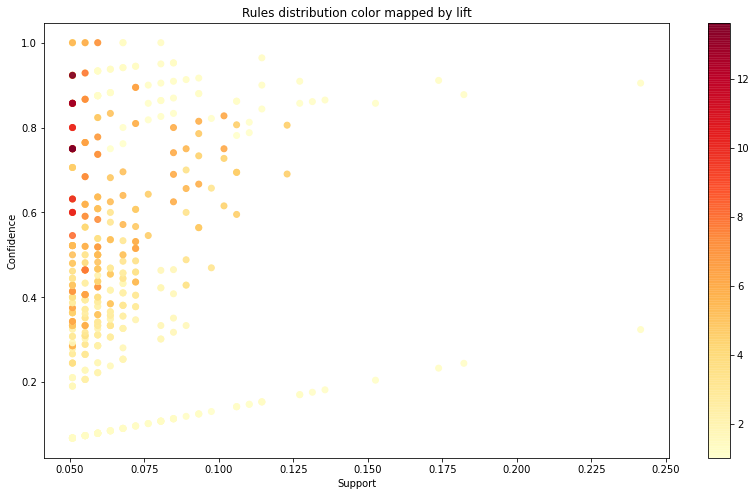

In [0]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(14, 8))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

In [0]:
frq_items_Sweden =apriori(basket_encoded_Sweden, min_support=0.05, use_colnames=True) 
rules = association_rules(frq_items_France, metric="lift", min_threshold=1)
rules=rules.sort_values(['confidence','lift'],ascending=['False','False'])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(POSTAGE),(BLUE 3 PIECE MINI DOTS CUTLERY SET),0.745763,0.067797,0.050847,0.068182,1.005682,0.000287,1.000413
115,(POSTAGE),(PACK OF 60 PINK PAISLEY CAKE CASES),0.745763,0.067797,0.050847,0.068182,1.005682,0.000287,1.000413
439,(POSTAGE),"(PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...",0.745763,0.067797,0.050847,0.068182,1.005682,0.000287,1.000413
505,(POSTAGE),"(STRAWBERRY LUNCH BOX WITH CUTLERY, RED TOADST...",0.745763,0.063559,0.050847,0.068182,1.072727,0.003447,1.004961
193,(POSTAGE),(STARS GIFT TAPE),0.745763,0.059322,0.050847,0.068182,1.149351,0.006607,1.009508


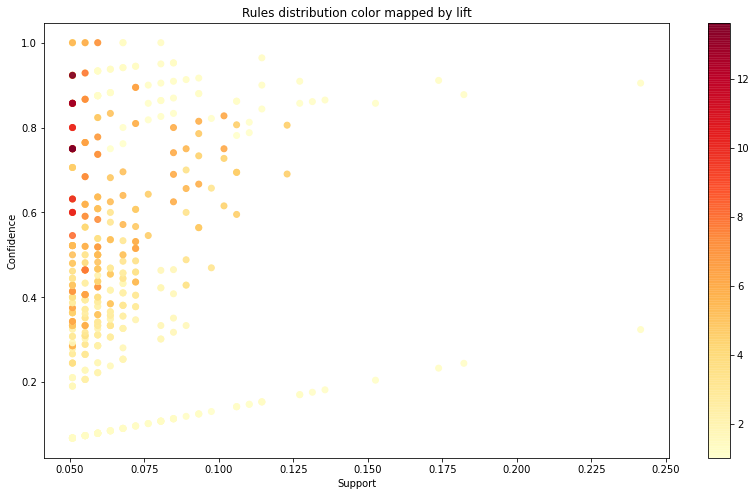

In [0]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(14, 8))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

To be continued for other countries.